In [2]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from wordcloud import WordCloud  # To generate word cloud visualizations from text data
from sklearn.feature_extraction.text import CountVectorizer  # To convert text documents into a matrix of token counts
from textblob import TextBlob  # For simple text processing, including sentiment analysis and part-of-speech tagging
import seaborn as sns  # For statistical data visualization based on matplotlib with improved aesthetics
from nltk.corpus import stopwords  # To access a list of common stopwords in various languages
import nltk  # The Natural Language Toolkit, used here to download language resources

# Download the stopwords dataset from NLTK if it hasn't been downloaded yet
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /nfs/rstudio-
[nltk_data]     users/home/mkhan_ss25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load data
df = pd.read_csv('NewOrleansReview.csv')

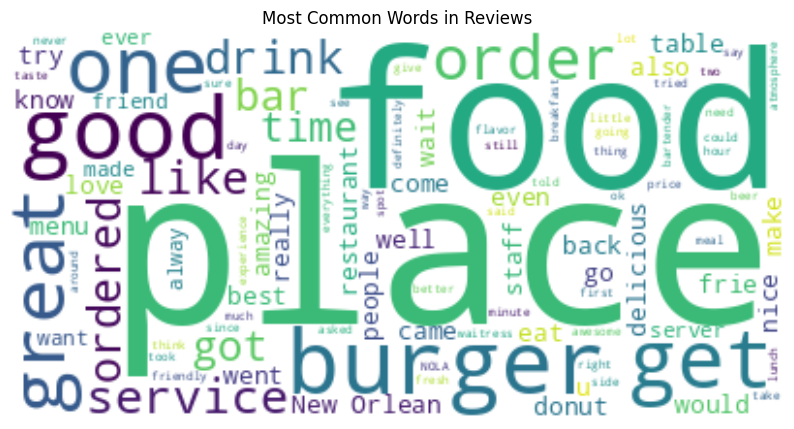

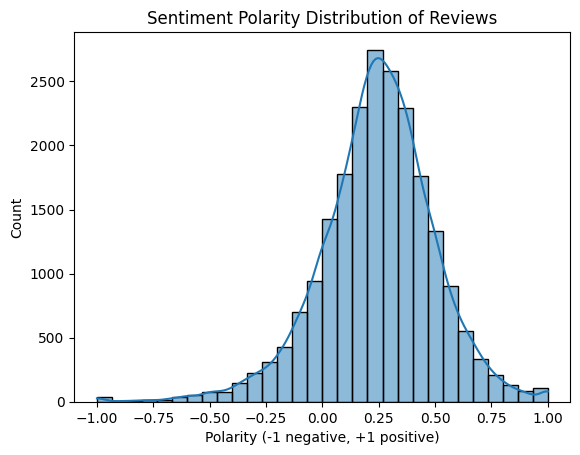

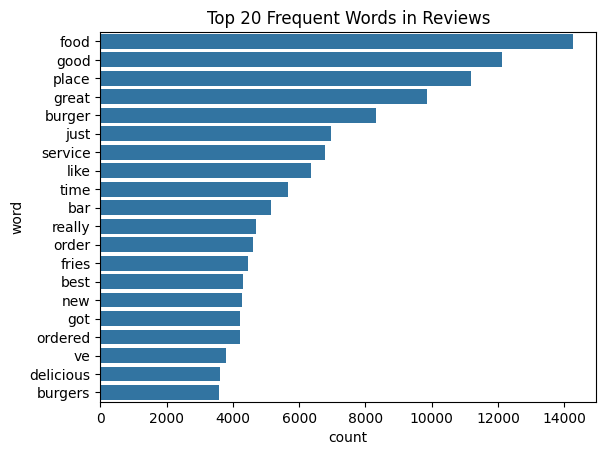

In [4]:
# Combine all reviews into one big string to create a word cloud
all_reviews = " ".join(df['review'].astype(str))

# Get the set of English stopwords to exclude from the word cloud
stop_words = set(stopwords.words('english'))

# Generate a word cloud image excluding stopwords, with a white background and max 100 words
wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(all_reviews)

# Set up the plot size
plt.figure(figsize=(10,6))
# Display the word cloud image with smooth interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Remove axis ticks and labels
plt.axis('off')
# Add a title to the plot
plt.title("Most Common Words in Reviews")
# Show the plot
plt.show()

# Perform sentiment analysis on each review, calculating polarity score between -1 and 1
df['polarity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot the distribution of sentiment polarity scores with histogram and KDE curve
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution of Reviews")
plt.xlabel("Polarity (-1 negative, +1 positive)")
plt.show()

# Use CountVectorizer to get the 20 most frequent words across all reviews (ignoring English stopwords)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['review'].astype(str))

# Create a DataFrame of words and their counts sorted descending by count
word_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)}).sort_values(by='count', ascending=False)

# Plot a horizontal bar chart of the top 20 frequent words
sns.barplot(x='count', y='word', data=word_freq)
plt.title("Top 20 Frequent Words in Reviews")
plt.show()

"""
This code performs a basic text analysis of review data contained in the 'review' column of the DataFrame:

1. Combines all reviews into a single large string to generate a word cloud visualization,
   excluding common English stopwords to highlight important words.

2. Calculates sentiment polarity for each individual review using TextBlob,
   and plots the distribution of these sentiment scores.

3. Finds the 20 most frequent words in all reviews using sklearn's CountVectorizer (ignoring stopwords),
   and displays these frequencies in a horizontal bar chart.

This approach gives a quick overview of the key themes and sentiments expressed in the reviews.
"""


/tmp/ipykernel_1346143/976827825.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotion', y='count', data=emotion_df, palette='pastel')


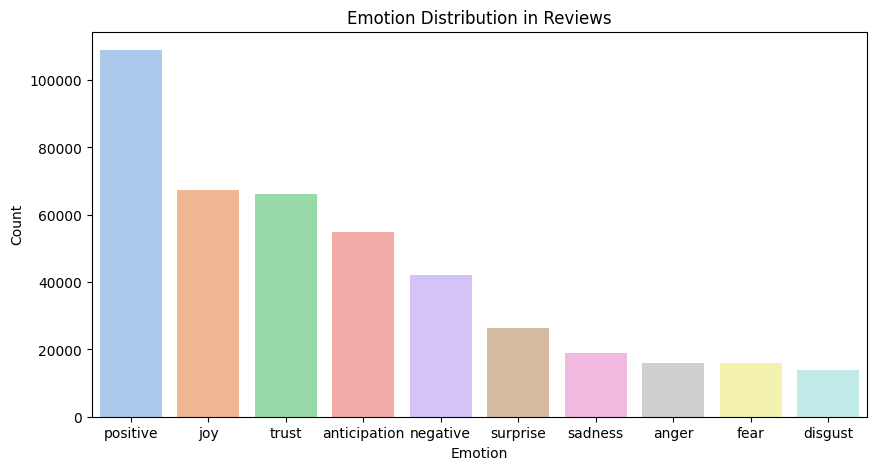

In [5]:
from nrclex import NRCLex  # Import NRCLex for emotion detection in text
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For data manipulation
import seaborn as sns  # For nicer plotting styles

# Define a function that returns the raw emotion scores from NRCLex for a given text
def get_emotions(text):
    emo = NRCLex(text)  # Initialize NRCLex with the input text
    return emo.raw_emotion_scores  # Return dictionary of emotions with counts

# Apply the get_emotions function to each review, converting review to string just in case
df['emotions'] = df['review'].astype(str).apply(get_emotions)

# Initialize a dictionary to aggregate emotion counts across all reviews
emotion_counts = {}

# Loop through each emotion dictionary for every review
for emotions_dict in df['emotions']:
    for emotion, count in emotions_dict.items():
        # Sum counts of each emotion into the aggregate dictionary
        emotion_counts[emotion] = emotion_counts.get(emotion, 0) + count

# Convert the aggregated emotion counts dictionary into a DataFrame
emotion_df = pd.DataFrame(list(emotion_counts.items()), columns=['emotion', 'count']).sort_values(by='count', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(10,5))
# Create a bar plot of emotions vs their counts with a pastel color palette
sns.barplot(x='emotion', y='count', data=emotion_df, palette='pastel')
# Add title and axis labels
plt.title("Emotion Distribution in Reviews")
plt.ylabel("Count")
plt.xlabel("Emotion")
# Show the plot
plt.show()

"""
This code performs emotion analysis on textual review data using the NRCLex library.

- Each review is analyzed to get raw counts of emotions (like joy, anger, sadness, etc.).
- Emotion counts from all reviews are aggregated to see overall frequency.
- A bar chart visualizes the distribution of different emotions expressed in the reviews.

This gives insight into the emotional tone and content across text data.
"""


In [6]:
emotion_df

,emotion,count
1,positive,108924
2,joy,67443
4,trust,66201
0,anticipation,54999
7,negative,42043
3,surprise,26451
8,sadness,18910
5,anger,16051
9,fear,16020
6,disgust,13990


In [8]:
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Common stopwords like "the", "and", etc.
from nltk.stem import WordNetLemmatizer  # Lemmatizer to reduce words to base form
import re  # Regular expressions for text cleaning

# Download required NLTK data files if not already downloaded
nltk.download('stopwords')  # List of stopwords
nltk.download('wordnet')  # WordNet corpus for lemmatization
nltk.download('punkt')  # Tokenizer models

# Define set of English stopwords
stop_words = set(stopwords.words('english'))
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text_nltk(text):
    # Convert text to lowercase to normalize
    text = text.lower()
    # Remove all characters except lowercase letters and whitespace (remove punctuation, numbers)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text into individual words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and words shorter than 3 characters, then lemmatize remaining tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    # Recombine tokens into a single cleaned string
    return " ".join(tokens)

# Apply preprocessing function to each review in the DataFrame, store in new column 'clean_review'
df['clean_review'] = df['review'].apply(preprocess_text_nltk)

"""
This code defines a text preprocessing pipeline that:
- Converts text to lowercase
- Removes punctuation and numbers
- Tokenizes the text
- Removes common English stopwords and very short words
- Lemmatizes words to their base forms

The cleaned text is stored in a new DataFrame column 'clean_review' to be used for further text analysis or modeling.
"""


[nltk_data] Downloading package stopwords to /nfs/rstudio-
[nltk_data]     users/home/mkhan_ss25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /nfs/rstudio-
[nltk_data]     users/home/mkhan_ss25/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /nfs/rstudio-
[nltk_data]     users/home/mkhan_ss25/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from sklearn.decomposition import LatentDirichletAllocation  # Import LDA for topic modeling

# Initialize CountVectorizer to convert text to a document-term matrix
# max_df=0.95 ignores words in more than 95% of documents (too common)
# min_df=5 ignores words in fewer than 5 documents (too rare)
# max_features=1000 limits to top 1000 words by frequency
vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=1000)

# Fit the vectorizer on the 'clean_review' column and transform reviews into feature matrix
X = vectorizer.fit_transform(df['clean_review'])

num_topics = 5  # Set number of topics to extract

# Initialize LDA model with the chosen number of topics and fixed random state for reproducibility
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model on the document-term matrix to learn topics
lda.fit(X)

"""
This code performs topic modeling on preprocessed review text:

1. Transforms cleaned reviews into a document-term matrix with CountVectorizer,
   filtering out very common and very rare words.

2. Fits a Latent Dirichlet Allocation (LDA) model to extract a specified number of topics (here, 5).

The result is a trained LDA model that can be used to explore dominant topics in the reviews.
"""


LatentDirichletAllocation(n_components=5, random_state=42)

In [11]:
def display_topics(model, feature_names, no_top_words):
    # Loop over each topic (component) in the LDA model
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")  # Print topic number starting from 1
        # Get the indices of the top words for this topic (sorted descending)
        top_words_indices = topic.argsort()[:-no_top_words - 1:-1]
        # Print the top words for this topic joined by commas
        print(", ".join([feature_names[i] for i in top_words_indices]))

no_top_words = 10  # Number of top words to display per topic
feature_names = vectorizer.get_feature_names_out()  # Get the vocabulary words from the vectorizer

# Call the function to display top words for each topic learned by the LDA model
display_topics(lda, feature_names, no_top_words)

"""
This function prints the top words that define each topic extracted by the LDA model.

- For each topic, it sorts the word probabilities (components_) and selects the top N words.
- Displays these top words to help interpret what each topic is about.
"""


Topic 1:
donut, coffee, slider, good, place, chicken, wing, like, one, also
Topic 2:
burger, fry, good, potato, place, cheese, like, get, baked, onion
Topic 3:
food, great, place, good, bar, service, new, orleans, drink, friendly
Topic 4:
food, order, time, get, one, service, table, minute, place, would
Topic 5:
good, food, great, fried, shrimp, ordered, chicken, service, place, salad


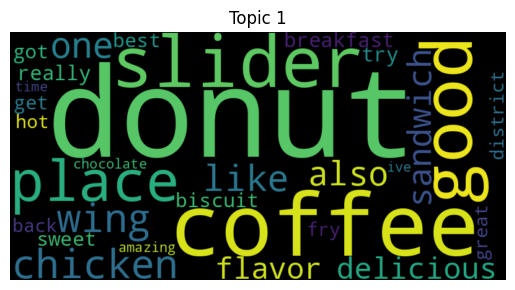

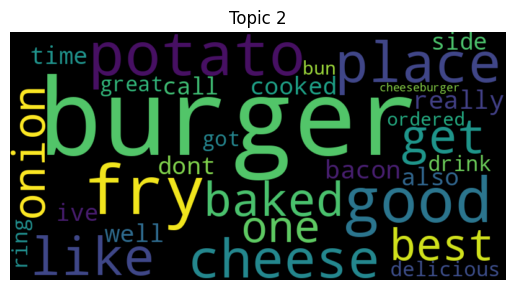

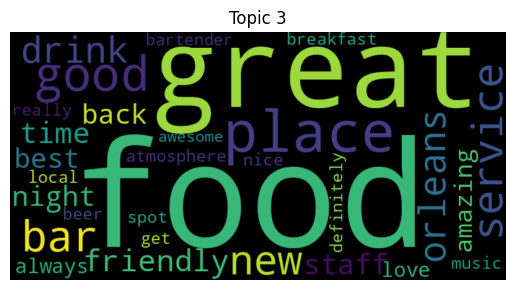

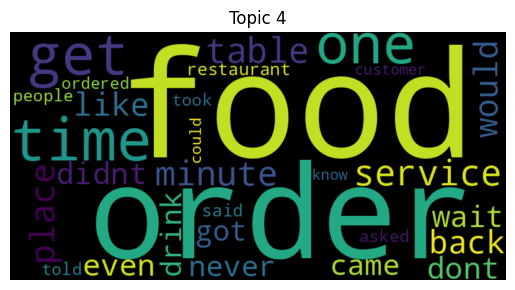

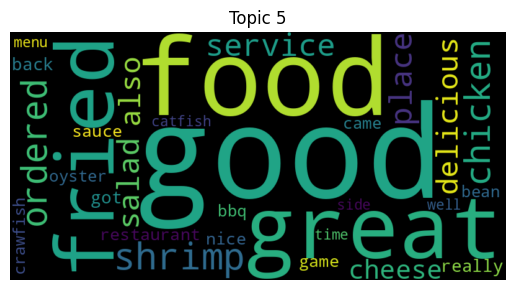

In [12]:
# Loop through each topic in the LDA model
for topic_idx, topic in enumerate(lda.components_):
    plt.figure()  # Create a new figure for each topic visualization
    
    # Create a dictionary of word frequencies for the top 30 words in the topic
    # topic.argsort() sorts the word indices by their importance (ascending),
    # so we take the last 30 (most important) in reverse order
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-30 - 1:-1]}
    
    # Generate a WordCloud image from the word frequencies for this topic
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    
    # Display the generated word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")  # Hide axis ticks and labels
    plt.title(f"Topic {topic_idx+1}")  # Title the plot with the topic number
    plt.show()  # Render the plot

"""
This code visualizes each LDA topic as a word cloud:

- For every topic, it selects the top 30 words with the highest weights.
- These words and their weights are used to generate a word cloud,
  which visually emphasizes the most important words in the topic.
- Each topic is shown in its own plot for clear interpretation.
"""
